# About Dataset big_data_mart_Train.csv

# Loading Dataset

In [1]:
import pandas as pd
df_bdm_train = pd.read_csv('big_data_mart_Train.csv')
df_bdm_train.head() #Printing first 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#Checking dimension
df_bdm_train.shape

(8523, 12)

# Preparing Dataset

In [3]:
#Copying dataset to new dataframe
df = df_bdm_train.copy()

In [4]:
#Checking null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#Checking datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Handling null values
import numpy as np
#For Item_Weight: as it is of continueous type, therefore, replacing all the null values with
#median because it is not impacted by the presence of outliers as compared to mean.
df["Item_Weight"].replace(np.nan,df["Item_Weight"].median(),inplace=True)
print(f'Item_Wight: {df["Item_Weight"].isnull().sum()}')

#For Outlet_Size: as it is of discrete type, therefore, reaplacing all the null values with
#forward fill because it is not impacted by the presence of outliers.
df["Outlet_Size"].fillna(method='ffill',inplace=True)
print(f"Outlet_Size: {df['Outlet_Size'].isnull().sum()}")

Item_Wight: 0
Outlet_Size: 0


# Label Encoding

In [7]:
#Checking unique values in categorical features before applying LabelEncoding
for x in df.columns:
    if df[x].dtypes == object:
        print("%-30s: %5d"%(x,len(df[x].unique())))

Item_Identifier               :  1559
Item_Fat_Content              :     5
Item_Type                     :    16
Outlet_Identifier             :    10
Outlet_Size                   :     3
Outlet_Location_Type          :     3
Outlet_Type                   :     4


In [8]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = {}
encoded_values = {}
for x in df.columns:
    if df[x].dtypes == object:
        le[x] = LabelEncoder()
        encoded_values[x] = le[x].fit_transform(df[x])
        print(f"%-30s: {le[x].classes_}\n"%x)

Item_Identifier               : ['DRA12' 'DRA24' 'DRA59' ... 'NCZ42' 'NCZ53' 'NCZ54']

Item_Fat_Content              : ['LF' 'Low Fat' 'Regular' 'low fat' 'reg']

Item_Type                     : ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']

Outlet_Identifier             : ['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049']

Outlet_Size                   : ['High' 'Medium' 'Small']

Outlet_Location_Type          : ['Tier 1' 'Tier 2' 'Tier 3']

Outlet_Type                   : ['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']



In [9]:
#Replacing the encoded_values with original values.
for x in encoded_values.keys():
    df[x] = encoded_values[x]
    
#Printing first 5 rows of encoded df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Statistical Summary

In [10]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.81342,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.238296,1.112871,1.201220,2181.288914
std,449.222377,4.22724,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.695901,0.812757,0.796459,1706.499616
min,0.000000,4.55500,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.31000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.60000,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.00000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.35000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


# Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


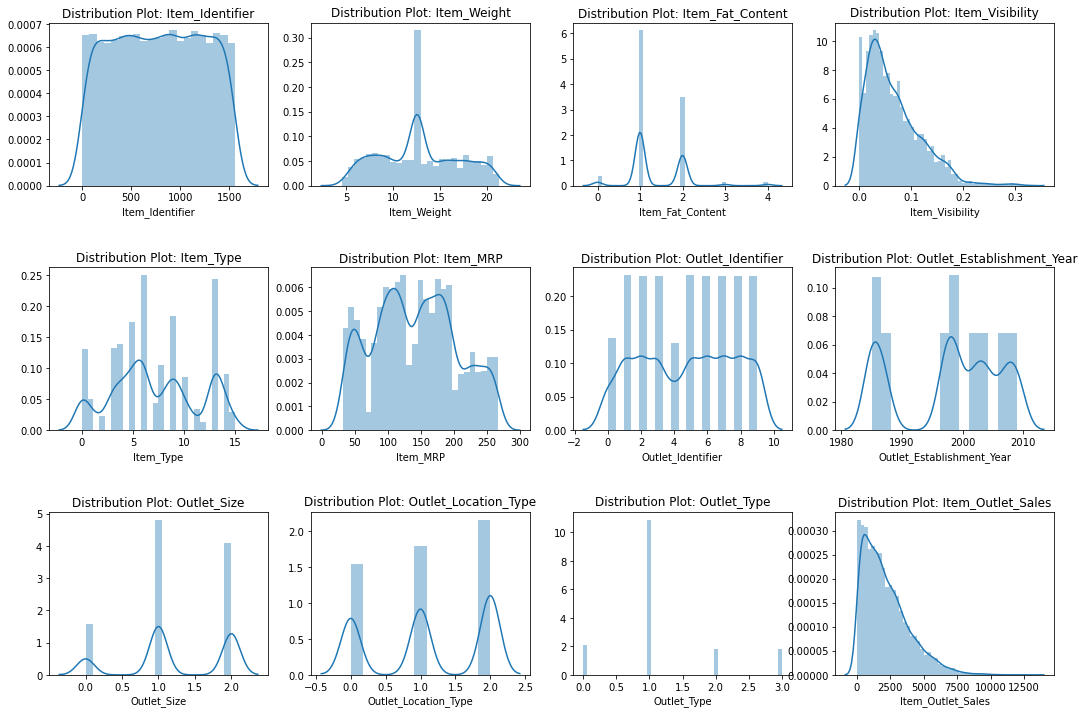

In [12]:
#Checking Data Distribution using distplot
rows = 3
cols = 4
fig,axes = plt.subplots(rows,cols,figsize=(rows*cols*1.5,rows*cols))
plt.subplots_adjust(hspace=0.5)
k = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[df.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df.columns[k]}")
        k = k+1
        
plt.show()

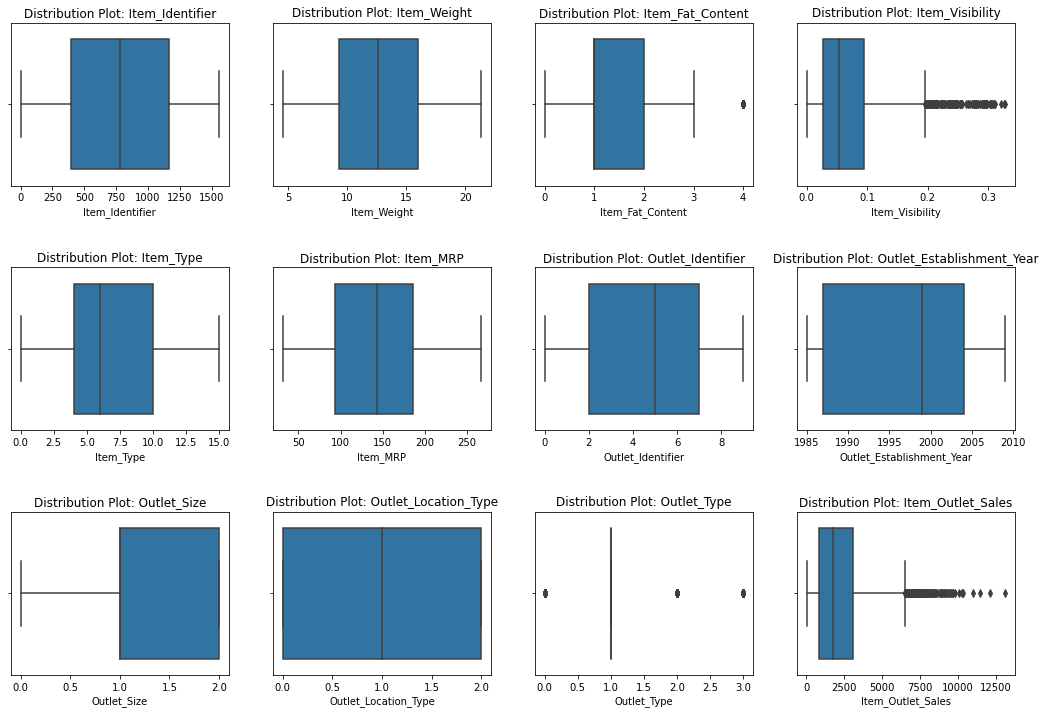

In [13]:
#Checking with box plot
rows = 3
cols = 4
fig,axes = plt.subplots(rows,cols,figsize=(rows*cols*1.5,rows*cols))
plt.subplots_adjust(hspace=0.5)
k = 0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(df[df.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df.columns[k]}")
        k = k+1
        
plt.show()

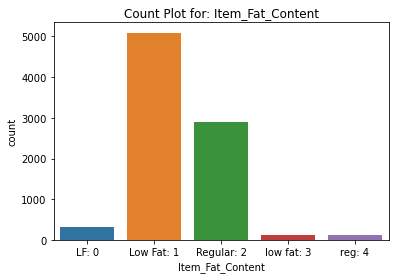

In [14]:
#Checking categorical feature Item_Fat_Content with countplot
x = 'Item_Fat_Content'
sns.countplot(df[x])
plt.title(f"Count Plot for: {x}")
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)])
plt.show()

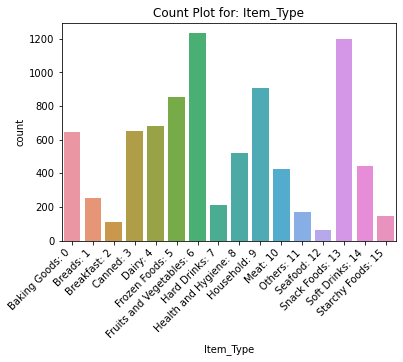

In [15]:
#Checking categorical feature Item_Type with countplot
x = 'Item_Type'
sns.countplot(df[x])
plt.title(f"Count Plot for: {x}")
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

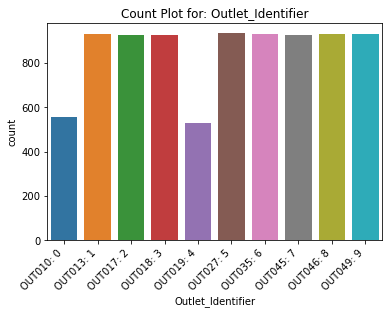

In [16]:
#Checking categorical feature Outlet_Identifier with countplot
x = 'Outlet_Identifier'
sns.countplot(df[x])
plt.title(f"Count Plot for: {x}")
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

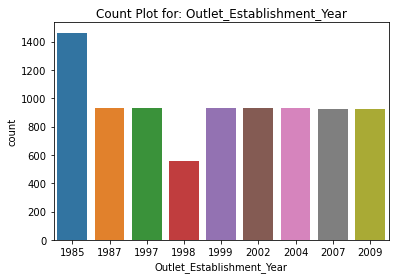

In [17]:
#Checking feature Outlet_Establishment_Year with countplot
x = 'Outlet_Establishment_Year'
sns.countplot(df[x])
plt.title(f"Count Plot for: {x}")
plt.show()

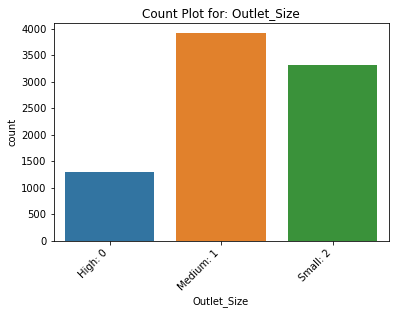

In [18]:
#Checking categorical feature Outlet_Size with countplot
x = 'Outlet_Size'
sns.countplot(df[x])
plt.title(f"Count Plot for: {x}")
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

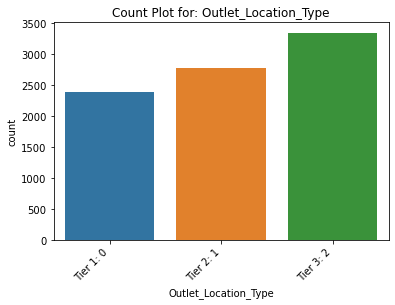

In [19]:
#Checking categorical feature Outlet_Location_Type with countplot
x = 'Outlet_Location_Type'
sns.countplot(df[x])
plt.title(f"Count Plot for: {x}")
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

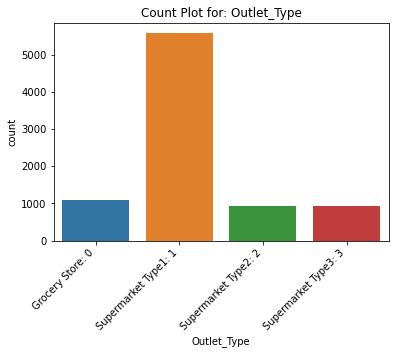

In [20]:
#Checking categorical feature Outlet_Type with countplot
x = 'Outlet_Type'
sns.countplot(df[x])
plt.title(f"Count Plot for: {x}")
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

# Bi-Variate Analysis

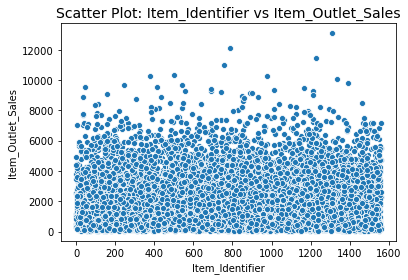

In [21]:
#Checking relationship between Item_Identifier and Item_Outlet_Sales using scatterplot
x = "Item_Identifier"
y = "Item_Outlet_Sales"
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}",fontsize=14)
plt.show()

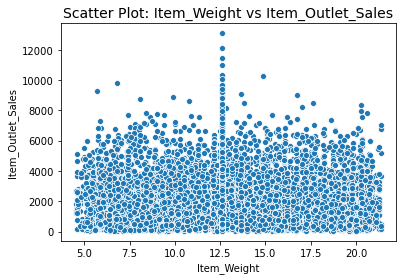

In [22]:
#Checking relationship between Item_Weight and Item_Outlet_Sales using scatterplot
x = "Item_Weight"
y = "Item_Outlet_Sales"
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}",fontsize=14)
plt.show()

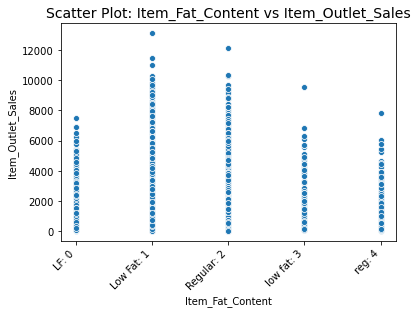

In [23]:
#Checking relationship between Item_Fat_Content and Item_Outlet_Sales using scatterplot
x = "Item_Fat_Content"
y = "Item_Outlet_Sales"
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}",fontsize=14)
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

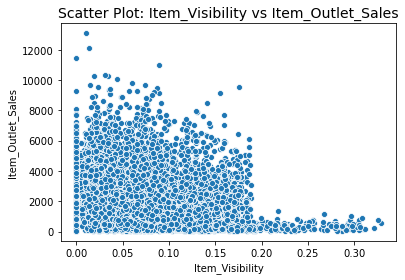

In [24]:
#Checking relationship between Item_Visibility and Item_Outlet_Sales using scatterplot
x = "Item_Visibility"
y = "Item_Outlet_Sales"
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}",fontsize=14)
plt.show()

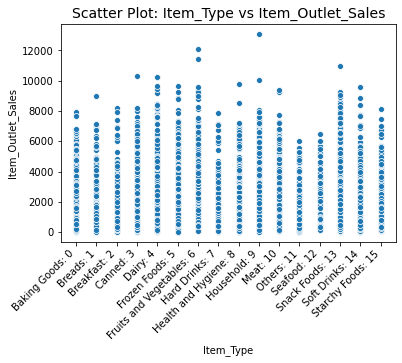

In [25]:
#Checking relationship between Item_Type and Item_Outlet_Sales using scatterplot
x = "Item_Type"
y = "Item_Outlet_Sales"
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}",fontsize=14)
plt.xticks(range(len(le[x].classes_)),labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

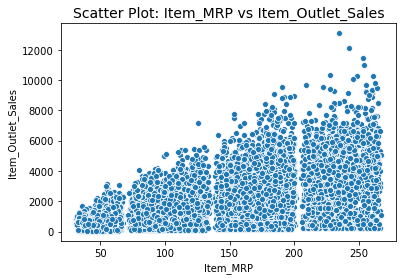

In [26]:
#Checking relationship between Item_MRP and Item_Outlet_Sales using scatterplot
x = "Item_MRP"
y = "Item_Outlet_Sales"
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}",fontsize=14)
plt.show()

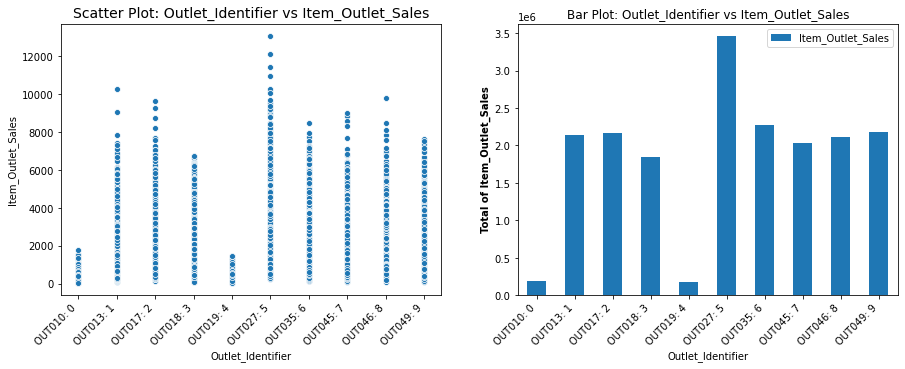

In [27]:
#Checking relationship between Outlet_Identifier and Item_Outlet_Sales
x = "Outlet_Identifier"
y = "Item_Outlet_Sales"
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

#Scatter Plot
sns.scatterplot(x,y,data=df,ax=ax1)
ax1.set_title(f"Scatter Plot: {x} vs {y}",fontsize=14)
ax1.set_xticks(range(len(le[x].classes_)))
ax1.set_xticklabels(labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")

#Bar plot 
df[[x,y]].groupby(x).sum().plot.bar(ax=ax2)
ax2.set_title(f"Bar Plot: {x} vs {y}",fontsize=12)
ax2.set_ylabel(f"Total of {y}",fontweight="bold")
ax2.set_xticks(range(len(le[x].classes_)))
ax2.set_xticklabels(labels=[f"{j}: {i}" for i,j in zip(range(len(le[x].classes_)),le[x].classes_)],
          rotation=45, horizontalalignment="right")
plt.show()

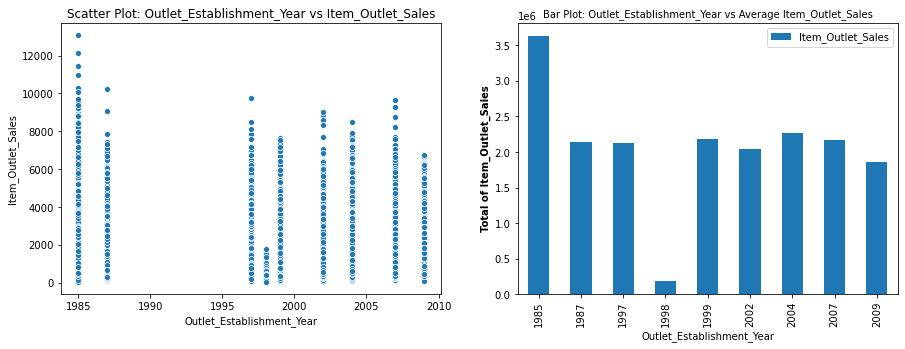

In [28]:
#Checking relationship between Outlet_Establishment_Year and Item_Outlet_Sales
x = "Outlet_Establishment_Year"
y = "Item_Outlet_Sales"
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

#Scatter Plot
sns.scatterplot(x,y,data=df,ax=ax1)
ax1.set_title(f"Scatter Plot: {x} vs {y}",fontsize=12)

#Bar plot 
df[[x,y]].groupby(x).sum().plot.bar(ax=ax2)
ax2.set_title(f"Bar Plot: {x} vs Average {y}",fontsize=10)
ax2.set_ylabel(f"Total of {y}",fontweight="bold")

plt.show()

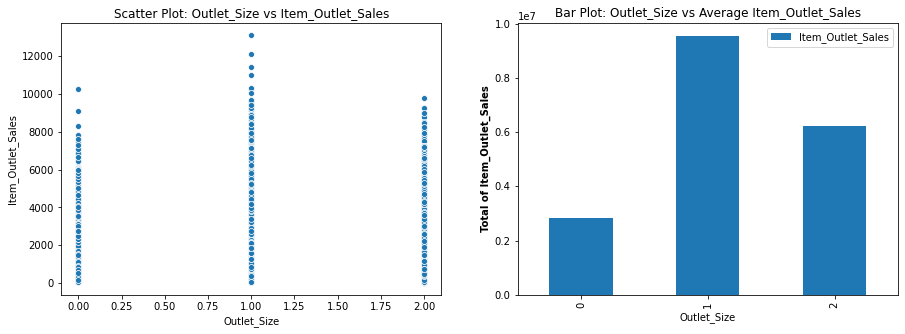

In [29]:
#Checking relationship between Outlet_Size and Item_Outlet_Sales
x = "Outlet_Size"
y = "Item_Outlet_Sales"
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

#Scatter Plot
sns.scatterplot(x,y,data=df,ax=ax1)
ax1.set_title(f"Scatter Plot: {x} vs {y}",fontsize=12)

#Bar plot
df[[x,y]].groupby(x).sum().plot.bar(ax=ax2)
ax2.set_title(f"Bar Plot: {x} vs Average {y}",fontsize=12)
ax2.set_ylabel(f"Total of {y}",fontweight="bold")

plt.show()

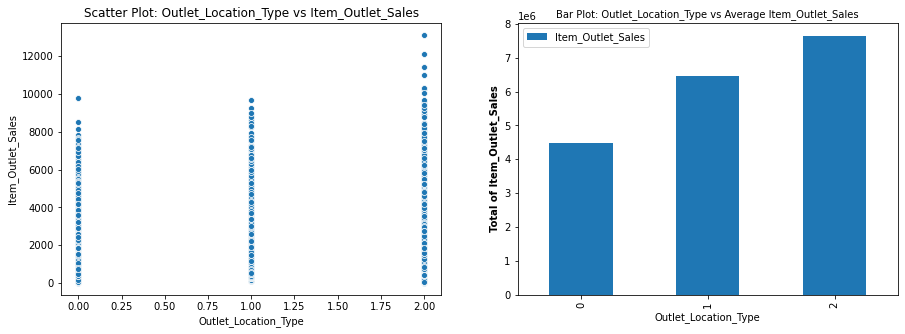

In [30]:
#Checking relationship between Outlet_Location_Type and Item_Outlet_Sales
x = "Outlet_Location_Type"
y = "Item_Outlet_Sales"
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

#Scatter Plot
sns.scatterplot(x,y,data=df,ax=ax1)
ax1.set_title(f"Scatter Plot: {x} vs {y}",fontsize=12)

#Bar plot
df[[x,y]].groupby(x).sum().plot.bar(ax=ax2)
ax2.set_title(f"Bar Plot: {x} vs Average {y}",fontsize=10)
ax2.set_ylabel(f"Total of {y}",fontweight="bold")

plt.show()

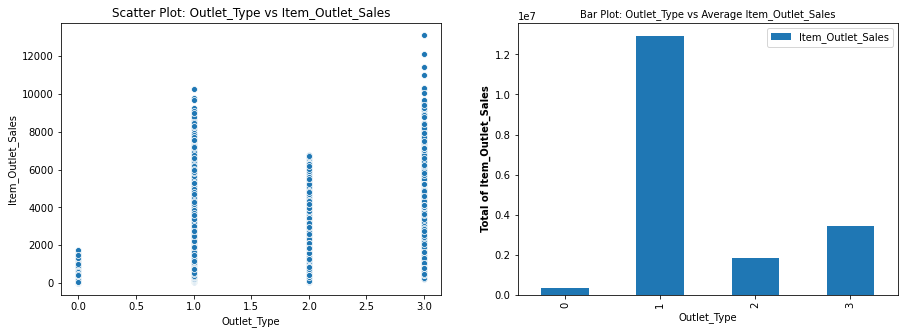

In [31]:
#Checking relationship between Outlet_Type and Item_Outlet_Sales
x = "Outlet_Type"
y = "Item_Outlet_Sales"
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

#Scatter Plot
sns.scatterplot(x,y,data=df,ax=ax1)
ax1.set_title(f"Scatter Plot: {x} vs {y}",fontsize=12)

#Bar plot
df[[x,y]].groupby(x).sum().plot.bar(ax=ax2)
ax2.set_title(f"Bar Plot: {x} vs Average {y}",fontsize=10)
ax2.set_ylabel(f"Total of {y}",fontweight="bold")

plt.show()

# Multi-Variate Analysis

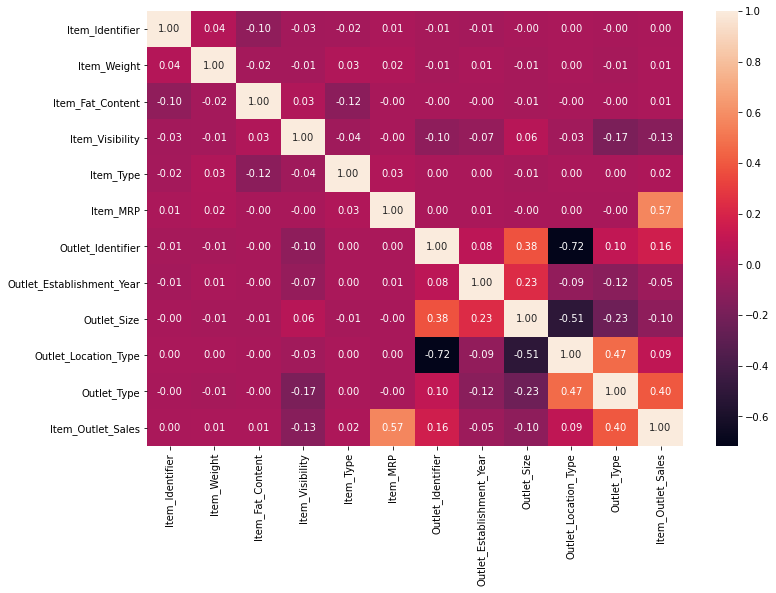

In [32]:
#Checking correlation of features
df_corr = df.corr()

#Displaying correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True,fmt=".2f")
plt.show()

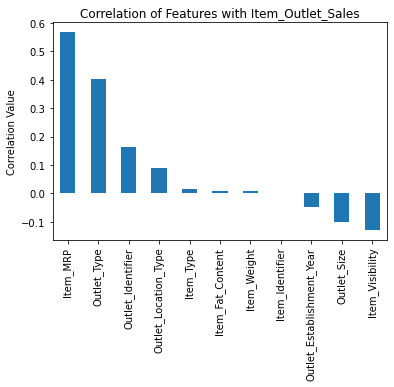

In [33]:
#Showing correlation of features with Item_Outlet_Sales using bar plot.
df_corr["Item_Outlet_Sales"].sort_values(ascending=False).drop('Item_Outlet_Sales').plot.bar()
plt.title("Correlation of Features with Item_Outlet_Sales")
plt.ylabel("Correlation Value")
plt.show()

In [34]:
#Dropping Item_Identifier from the dataset
df_new = df.drop(columns=['Item_Identifier'])
df_new.shape

(8523, 11)

# Removing Outliers

In [35]:
#Checking outliers with the help of zscore
from scipy.stats import zscore
z = np.abs(zscore(df_new))
#printing locationg of outliers
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [36]:
#Removing outliers
df_wo = df_new[(z<=3).all(axis=1)]
print(f"Original Shape: {df_new.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df_new)-len(df_wo))*100/len(df_new)}%")

Original Shape: (8523, 11)
New Shape: (8222, 11)
% Loss: 3.5316203214830457%


# Skewness

In [37]:
#Checking skewness in dataset (optimum value -0.5 to +0.5)
df_wo.skew()

Item_Weight                  0.117321
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.358463
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

# Preparing Data for Model

In [38]:
#Seperating Input and Output variable
X = df_wo.drop(columns=['Item_Outlet_Sales'])
Y = df_wo['Item_Outlet_Sales']
print(X.shape)
print(Y.shape)

(8222, 10)
(8222,)


In [39]:
#Treating Skewness
from sklearn.preprocessing import power_transform
x = power_transform(X, method='yeo-johnson')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [40]:
#Scaling data for model using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Finding Best Model

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [42]:
#Defining function for best random_state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_r2Score = 0
    for i in r:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        
        temp_r2Score = r2_score(y_test,predict_y)
        if temp_r2Score>best_r2Score:
            best_r2Score = temp_r2Score
            best_rState = i
            
    return best_rState,best_r2Score


#Defining function for best CV
def get_best_cv(model,parameters,x_train,y_train,r=range(2,20)):
    best_cv = 0
    best_cvScore = 0
    for i in r:
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
            
    return best_cv,best_cvScore

#Defining function for building models
def build_model(models,x,y,r_range=range(100),t_size=0.25,cv_range=range(2,20)):
    for i in models:
        #Finding the best random_state for train test split
        best_rState, best_r2Score = get_best_rstate(r_range,models[i]["name"],x,y)
        
        #Splitting train test data with best random_state
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size,random_state=best_rState)
        
        #Hypertuning Parameters
        #Finding best CV
        best_cv, best_cvScore = get_best_cv(models[i]["name"],models[i]["parameters"],x_train,y_train,cv_range)
        
        #Building final model with hypertuned parameters
        gscv = GridSearchCV(models[i]["name"],models[i]["parameters"],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #Checking Final Performance of the model
        predict_y = gscv.best_estimator_.predict(x_test)
        r2Score = r2_score(y_test,predict_y)
        mse = mean_squared_error(y_test,predict_y)
        mae = mean_absolute_error(y_test,predict_y)
        
        #Storing model specs.
        models[i]["random_state"] = best_rState
        models[i]["initial_r2_score"] = best_r2Score
        models[i]["x_train"] = x_train
        models[i]["x_test"] = x_test
        models[i]["y_train"] = y_train
        models[i]["y_test"] = y_test
        models[i]["cv"] = best_cv
        models[i]["cross_val_score"] = best_cvScore
        models[i]["gscv"] = gscv
        models[i]["predict_y"] = predict_y
        models[i]["r2_score"] = r2Score
        models[i]["mse"] = mse
        models[i]["rmse"] = np.sqrt(mse)
        models[i]["mae"] = mae
        
    return models;


# Preparing Model List and Testing for Best Model

In [43]:
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
#Preparing List of Models with parameters
models = {
    "LinearRegression":{
        "name": LinearRegression(),
        "parameters":{
            "fit_intercept":[True,False],
            "normalize":[True,False]
        }
    },
    "Lasso":{
        "name": Lasso(),
        "parameters":{
            "alpha":[0.1,1.0],
            "fit_intercept":[True,False],
            "normalize":[True,False],
            "max_iter":[1000,1500],
            "selection":['cyclic','random']
        }
    },
    "Ridge":{
        "name": Ridge(),
        "parameters":{
            "alpha":[0.1,1.0],
            "fit_intercept":[True,False],
            "normalize":[True,False],
            "solver":['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
        }
    },
    "SGDRegressor":{
        "name": SGDRegressor(),
        "parameters":{
            "loss":['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],
            "alpha":[0.00001,0.0001],
            "shuffle":[True,False],
            "max_iter":[10000]
        }
    }
}

#Building models
build_models = build_model(models,x,Y)

In [44]:
#Dispalying model performance
for i in build_models:
    model = build_models[i]
    print(f"START: {i}===================\n")
    print(f"Best random_state: {model['random_state']} with best r2_score: {model['initial_r2_score']}\n")
    print(f"Best CV: {model['cv']} with best cross_value_score: {model['cross_val_score']}\n")
    print(f"Best params: {model['gscv'].best_params_}\n")
    print(f"Final Performance:")
    print(f"R2_SCORE: {round(model['r2_score']*100,2)}%\t MSE: {model['mse']}\t RMSE: {model['rmse']}\t MAE: {model['mae']}\n")
    print(f"END: {i}=====================\n\n\n")

START: LinearRegression===================

Best random_state: 19 with best r2_score: 0.5373573062899667

Best CV: 3 with best cross_value_score: 0.5048353755021128

Best params: {'fit_intercept': True, 'normalize': False}

Final Performance:
R2_SCORE: 53.74%	 MSE: 1154620.0047156236	 RMSE: 1074.5324586607999	 MAE: 815.4697295524122

END: LinearRegression=====================



START: Lasso===================

Best random_state: 19 with best r2_score: 0.5372875777294278

Best CV: 3 with best cross_value_score: 0.5048659982277898

Best params: {'alpha': 1.0, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'selection': 'random'}

Final Performance:
R2_SCORE: 53.73%	 MSE: 1154800.850256487	 RMSE: 1074.6166061700735	 MAE: 815.4595621775377

END: Lasso=====================



START: Ridge===================

Best random_state: 19 with best r2_score: 0.537345251276867

Best CV: 3 with best cross_value_score: 0.5048360145097496

Best params: {'alpha': 0.1, 'fit_intercept': True,

# Model Saving or Serialization

In [47]:
import joblib
filename = 'big_data_mart_problem.pkl'
final_model = build_models["Ridge"]
joblib.dump(final_model['gscv'].best_estimator_,open(filename,'wb'))

# Conclusion

In [48]:
cnc = pd.DataFrame({"Original":np.array(final_model['y_test']),"Predicted":np.array(final_model['predict_y'])})
cnc                    

,Original,Predicted
0,149.1392,-578.281160
1,2553.3430,2646.215491
2,2579.9750,1877.623130
3,466.0600,1330.682570
4,1897.5300,1844.983133
...,...,...
2051,1414.1592,2338.714176
2052,3414.8882,2594.258455
2053,319.5840,1344.782914
2054,6622.7126,3221.899986
